In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('D:\Semester\SEM 4\Emotion_features.csv')

In [3]:
dataset.head()

,id,song_name,class,label,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,1,30 seconds to Mars - Night of the Hunter.mp3,relax,3,117.453835,139925,1283.715596,0.422269,0.293326,0.086040,...,0.007792,0.000001,0.131658,0.017334,0.000142,0.095362,0.009094,4.221388,1.601396,2.564469
1,2,Absolutely - Story of A Girl.mp3,sad,1,129.199219,159877,1268.865079,0.425321,0.289704,0.083929,...,0.008534,-0.000003,0.169204,0.028630,0.000006,0.099145,0.009830,3.246150,1.885735,3.555996
2,3,Ace - Futureland.mp3,happy,2,99.384014,121594,1253.546392,0.487377,0.268670,0.072184,...,0.006199,0.000019,0.206916,0.042814,-0.000077,0.115425,0.013323,3.989188,1.766115,3.119163
3,4,Alan Walker - Faded.mp3,sad,1,89.102909,113611,1291.034091,0.292934,0.295695,0.087435,...,0.002483,-0.000020,0.184177,0.033921,-0.000003,0.055471,0.003077,3.423782,1.922333,3.695364
4,5,Alan Walker - Force [Instrumental].mp3,relax,3,198.768029,252770,1404.277778,0.286669,0.300049,0.090029,...,0.002977,0.000014,0.147811,0.021848,0.000307,0.048204,0.002324,9.637442,7.344525,53.942050


1 - Sad       
2 - Happy      
3 - Relax     
        4 - Angry 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 58 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   75 non-null     int64  
 1   song_name            75 non-null     object 
 2   class                75 non-null     object 
 3   label                75 non-null     int64  
 4   tempo                75 non-null     float64
 5   total_beats          75 non-null     int64  
 6   average_beats        75 non-null     float64
 7   chroma_stft_mean     75 non-null     float64
 8   chroma_stft_std      75 non-null     float64
 9   chroma_stft_var      75 non-null     float64
 10  chroma_cq_mean       75 non-null     float64
 11  chroma_cq_std        75 non-null     float64
 12  chroma_cq_var        75 non-null     float64
 13  chroma_cens_mean     75 non-null     float64
 14  chroma_cens_std      75 non-null     float64
 15  chroma_cens_var      75 non-null     float

In [5]:
dataset.shape

(75, 58)

In [6]:
dataset['label'].describe()

count    75.000000
mean      2.266667
std       1.119041
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       4.000000
Name: label, dtype: float64

In [7]:
dataset["label"].unique()

array([3, 1, 2, 4], dtype=int64)

Correlation

In [8]:
print(dataset.corr()["label"].abs().sort_values(ascending=False))

label                  1.000000
chroma_stft_mean       0.398708
contrast_mean          0.396730
tonnetz_std            0.391225
tonnetz_var            0.377318
chroma_cens_std        0.372121
chroma_cens_var        0.369683
chroma_cq_mean         0.368606
chroma_cens_mean       0.363385
melspectrogram_mean    0.340947
poly_std               0.332819
poly_mean              0.328712
harm_var               0.327513
chroma_cq_std          0.325405
poly_var               0.324941
chroma_cq_var          0.321206
rmse_mean              0.319575
melspectrogram_std     0.314458
perc_std               0.304244
mfcc_mean              0.297226
harm_std               0.297069
melspectrogram_var     0.266327
perc_var               0.265060
mfcc_std               0.258430
rmse_std               0.257853
mfcc_var               0.248526
rmse_var               0.247372
frame_mean             0.202871
mfcc_delta_mean        0.170210
frame_std              0.169977
chroma_stft_var        0.163213
chroma_s

2    25
1    23
4    16
3    11
Name: label, dtype: int64


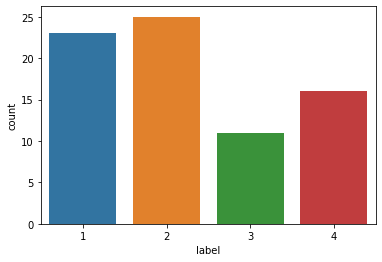

In [9]:
y = dataset["label"]

sns.countplot(y)


target_temp = dataset.label.value_counts()

print(target_temp)

In [10]:
target_temp

2    25
1    23
4    16
3    11
Name: label, dtype: int64

In [11]:
print("Percentage of Sad songs  : " +str(round(target_temp[1]*100/75,2)))
print("Percentage of happy songs : " +str(round(target_temp[2]*100/75,2)))
print("Percentage of Relax songs : " +str(round(target_temp[3]*100/75,2)))
print("Percentage of Angry songs : " +str(round(target_temp[4]*100/75,2)))

Percentage of Sad songs  : 30.67
Percentage of happy songs : 33.33
Percentage of Relax songs : 14.67
Percentage of Angry songs : 21.33


Train 

In [12]:
feature = dataset.loc[:, 'tempo':]
featureName = list(feature)

In [13]:
for name in featureName:
    feature[name] = (feature[name] - feature[name].min()) / (feature[name].max() - feature[name].min())

In [14]:
from sklearn.model_selection import train_test_split
target = dataset.loc[:, 'class'].dropna()
X_train,X_test,Y_train,Y_test = train_test_split(feature,target,test_size=0.20,random_state=0)

In [15]:
X_train.shape

(60, 54)

In [16]:
X_test.shape

(15, 54)

In [17]:
Y_train.shape

(60,)

In [18]:
Y_test.shape

(15,)

Model Fitting

In [19]:
from sklearn.metrics import accuracy_score

Logistic

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [21]:
Y_pred_lr.shape

(15,)

In [22]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 60.0 %


Naive BAyers

In [23]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [24]:
Y_pred_nb.shape

(15,)

In [25]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 40.0 %


SVM

In [26]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [27]:
Y_pred_svm.shape

(15,)

In [28]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 60.0 %


KNN


In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [30]:
Y_pred_knn.shape

(15,)

In [31]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 66.67 %


Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
print(Y_pred_dt.shape)


(15,)


In [33]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 46.67 %


Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

80.0
338


In [35]:
Y_pred_rf.shape

(15,)

In [36]:

score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 80.0 %


XGBoost

In [37]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

[15:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [38]:
Y_pred_xgb.shape


(15,)

In [39]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 53.33 %


In [40]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 60.0 %
The accuracy score achieved using Naive Bayes is: 40.0 %
The accuracy score achieved using Support Vector Machine is: 60.0 %
The accuracy score achieved using K-Nearest Neighbors is: 66.67 %
The accuracy score achieved using Decision Tree is: 46.67 %
The accuracy score achieved using Random Forest is: 80.0 %
The accuracy score achieved using XGBoost is: 53.33 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

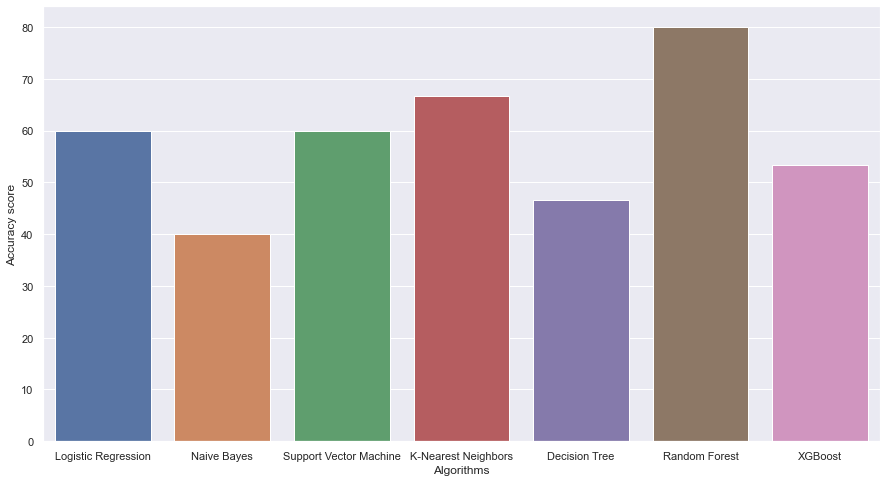

In [41]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

In [43]:
df= pd.read_csv('Emotion_features_extract.csv')

In [44]:
df.head()

,Unnamed: 0,song_name,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,1,2U.mp3,143.554688,181528,1287.432624,0.337507,0.297164,0.088306,0.378381,0.262614,...,0.005197,0.000005,0.195518,0.038227,0.000047,0.087004,0.007570,3.503891,1.884495,3.551321
1,2,Adele - Hello.mp3,172.265625,198026,1692.529915,0.592441,0.260705,0.067967,0.647986,0.222002,...,0.003062,-0.000176,0.007754,0.000060,-0.000293,0.009900,0.000098,31.933243,10.268238,105.436712
2,3,Alan Walker - Darkside (feat. AuRa and Tomine ...,86.132812,108798,1279.976471,0.298282,0.300772,0.090464,0.340307,0.288041,...,0.004128,-0.000010,0.173936,0.030254,-0.000036,0.073001,0.005329,7.303837,3.918483,15.354511
3,4,Alan Walker - Diamond Heart (feat. Sophia Soma...,89.102909,109606,1336.658537,0.283401,0.298075,0.088849,0.346237,0.278222,...,0.002587,0.000002,0.125562,0.015766,-0.000021,0.051719,0.002675,6.856853,1.921037,3.690383
4,5,Alan Walker - Different World feat. Sofia Cars...,129.199219,163991,1281.179688,0.366581,0.294307,0.086616,0.391032,0.295567,...,0.005414,-0.000030,0.183346,0.033616,0.000082,0.106256,0.011290,7.022875,3.666264,13.441495


In [45]:
predictors = df.loc[:,'tempo':]
prednames = list(predictors)
for name in prednames:
    predictors[name] = (predictors[name] - predictors[name].min()) / (predictors[name].max() - predictors[name].min())

In [46]:
songs = df['song_name']

In [47]:
songs

0                                                2U.mp3
1                                     Adele - Hello.mp3
2     Alan Walker - Darkside (feat. AuRa and Tomine ...
3     Alan Walker - Diamond Heart (feat. Sophia Soma...
4     Alan Walker - Different World feat. Sofia Cars...
                            ...                        
65                                              Wow.mp3
66    XXXTENTACION & Lil Pump - Arms Around You (Lyr...
67    Zara Larsson - Ain't My Fault (Official Video)...
68                   ZAYN - Rainberry (Lyric Video).mp3
69    Zedd, Grey - The Middle (Lyrics) ft. Maren Mor...
Name: song_name, Length: 70, dtype: object

In [48]:
output = rf.predict(predictors)

In [54]:
rf_predicted = pd.concat([songs,pd.DataFrame(output,columns=['class']),predictors],axis=1)

In [55]:
rf_predicted

,song_name,class,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,chroma_stft_var,chroma_cq_mean,chroma_cq_std,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,2U.mp3,sad,0.571759,0.652573,0.319039,0.274588,0.487642,0.456309,0.248680,0.457973,...,0.325239,0.695645,0.602880,0.374820,0.414739,0.469630,0.247359,0.056487,0.093822,0.024119
1,Adele - Hello.mp3,angry,0.794444,0.769003,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.165833,0.662240,0.000000,0.000000,0.337370,0.000000,0.000000,1.000000,1.000000,1.000000
2,Alan Walker - Darkside (feat. AuRa and Tomine ...,sad,0.126389,0.139302,0.306506,0.162971,0.535894,0.504704,0.142575,0.744711,...,0.245454,0.692909,0.533585,0.296517,0.395922,0.384339,0.173183,0.182599,0.313671,0.137172
3,Alan Walker - Diamond Heart (feat. Sophia Soma...,sad,0.149425,0.145005,0.401787,0.120629,0.499835,0.468482,0.159102,0.633984,...,0.130375,0.695268,0.378262,0.154237,0.399305,0.254712,0.085309,0.167765,0.097772,0.025451
4,Alan Walker - Different World feat. Sofia Cars...,sad,0.460417,0.528811,0.308528,0.357317,0.449425,0.418394,0.283933,0.829579,...,0.341475,0.689324,0.563800,0.329535,0.422608,0.586890,0.370533,0.173275,0.286409,0.118849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Wow.mp3,happy,0.229167,0.257348,0.666855,0.452473,0.899337,0.887984,0.316708,0.579355,...,0.165636,0.702740,1.000000,1.000000,0.304865,0.796402,0.651707,0.068817,0.140574,0.041526
66,XXXTENTACION & Lil Pump - Arms Around You (Lyr...,sad,0.571759,0.661910,0.319461,0.377760,0.442388,0.411452,0.173100,0.753615,...,0.172408,0.697048,0.565531,0.331480,0.398690,0.574719,0.356607,0.159404,0.182648,0.060255
67,Zara Larsson - Ain't My Fault (Official Video)...,sad,0.571759,0.647189,0.325336,0.442387,0.516665,0.485348,0.252327,0.829121,...,0.728876,0.696064,0.651265,0.434918,0.401073,0.442178,0.222068,0.060802,0.053083,0.011873
68,ZAYN - Rainberry (Lyric Video).mp3,happy,0.174107,0.186600,0.288443,0.283986,0.824771,0.806646,0.360609,0.628457,...,0.118365,0.693208,0.740972,0.558143,0.356789,0.621441,0.411508,0.038030,0.084708,0.021143


In [56]:
rf_predicted.to_csv('Project/rf_predicted.csv')